<a href="https://colab.research.google.com/github/muralidharan-1708/DL-Projects/blob/main/CNN_for_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers, datasets

In [61]:
mnist = datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
print(x_train.shape)

(60000, 28, 28)


Ankle boot


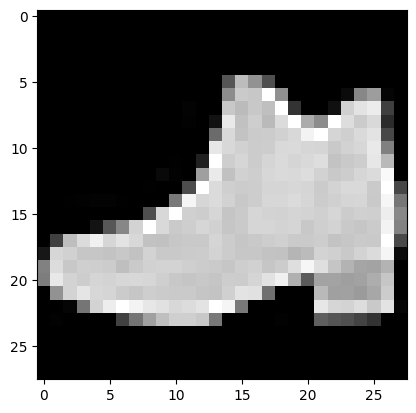

In [64]:
plt.imshow(x_train[15] ,cmap='grey')
print(class_names[y_train[15]])

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 32)       │        18,464 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,280 (145.62 KB)

 Trainable params: 37,280 (145.62 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'relu'))

In [68]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [69]:
history = model.fit(x_train, y_train, epochs = 20, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6704 - loss: 0.9730 - val_accuracy: 0.8210 - val_loss: 0.6033
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8349 - loss: 0.5761 - val_accuracy: 0.8250 - val_loss: 0.5703
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.5223 - val_accuracy: 0.8628 - val_loss: 0.5221
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8764 - loss: 0.4846 - val_accuracy: 0.8633 - val_loss: 0.5231
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8866 - loss: 0.4605 - val_accuracy: 0.8798 - val_loss: 0.4978
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8975 - loss: 0.4458 - val_accuracy: 0.8743 - val_loss: 0.5036
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9036 - loss: 0.4260 - val_accuracy: 0.8822 - val_loss: 0.4889
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9085 - loss: 0.4

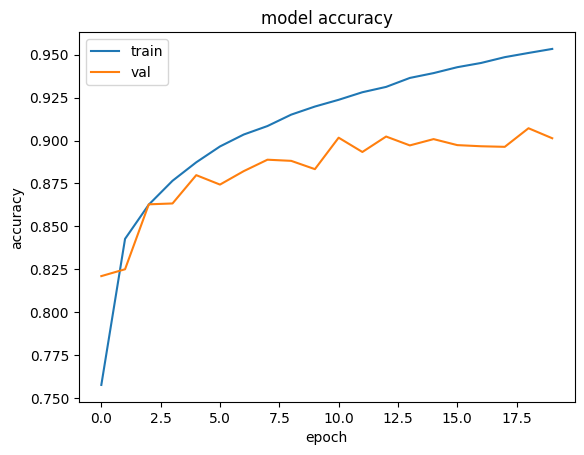

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

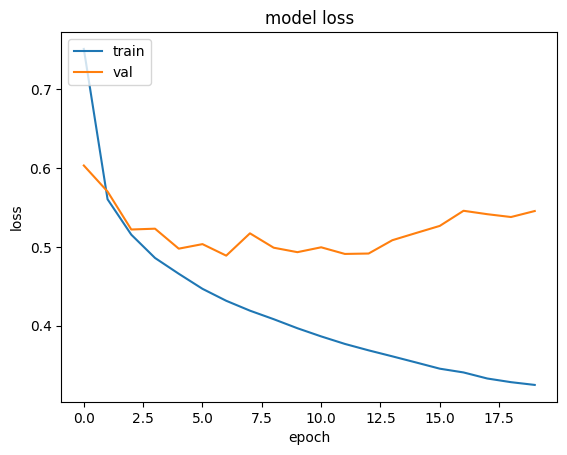

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [72]:
y_pred = model.predict(x_test)
import numpy as np
y_pred1 = np.argmax(y_pred, axis = 1)
y_pred1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.899

Text(0.5, 1.0, 'y_test: 9, y_pred1 : 9')

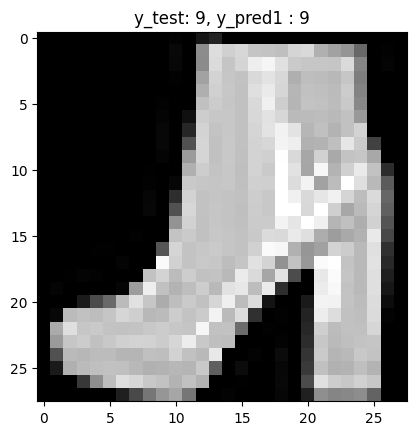

In [74]:
plt.imshow(x_test[756], cmap='grey')
plt.title(f"y_test: {y_test[756]}, y_pred1 : {y_pred1[756]}")

In [75]:
tf.keras.models.save_model(model, 'fashion_mnist_model.hdf5')